             MAE           MSE           RMSE       MAPE  R^2 Score
0  433407.956416  2.745740e+11  523998.090827  62.418114   0.147695


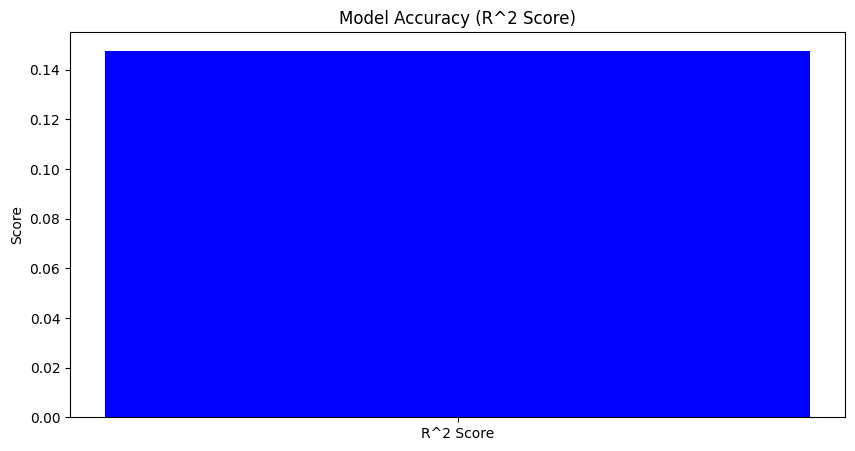

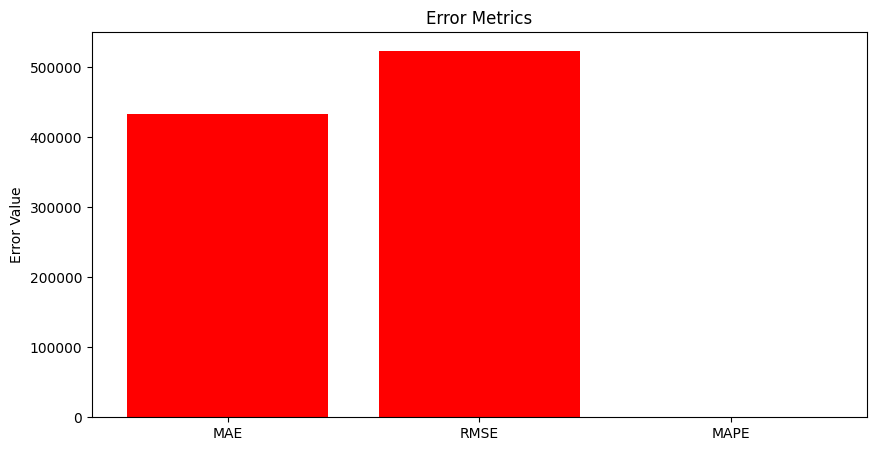

In [ ]:
#LINEAR REGRESSION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('Walmart_sales (1).csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)
features = data.drop('Weekly_Sales', axis=1)
target = data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2 = r2_score(y_test, predictions)
error_metrics = pd.DataFrame({
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAPE': [mape],
    'R^2 Score': [r2]
})
print(error_metrics)

# Accuracy Plot (R^2 Score)
plt.figure(figsize=(10, 5))
plt.bar(['R^2 Score'], [r2], color='blue')
plt.ylabel('Score')
plt.title('Model Accuracy (R^2 Score)')
plt.show()

# Error Rate Plot
errors = [mae, rmse, mape]
error_names = ['MAE', 'RMSE', 'MAPE' ]

plt.figure(figsize=(10, 5))
plt.bar(error_names, errors, color='red')
plt.ylabel('Error Value')
plt.title('Error Metrics')
plt.show()


MAE: 471047.8354309249
RMSE: 575603.9732461201
MAPE: 61.998656728877066%
Mean Squared Error (MSE): 331319934016.72015
  Metric          Value
0    MAE  471047.835431
1   RMSE  575603.973246
2   MAPE      61.998657
R^2 Score (Accuracy): -0.12087565958226532


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


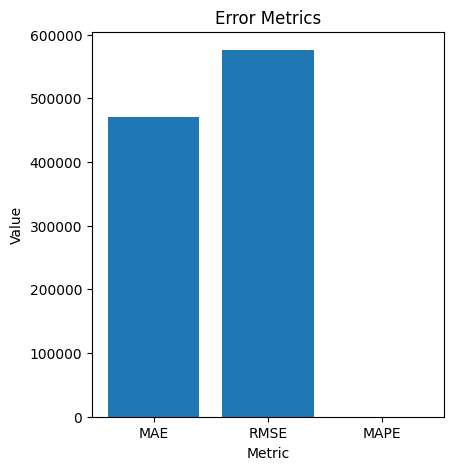

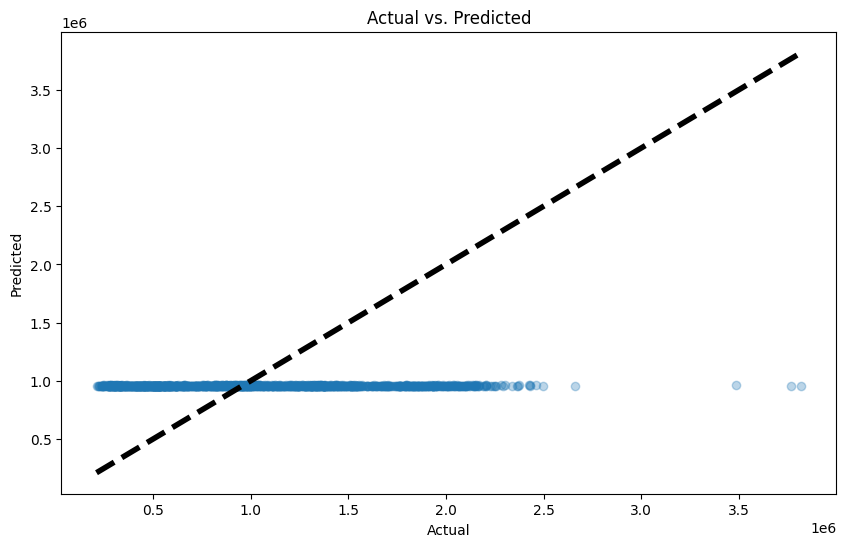

<Figure size 640x480 with 0 Axes>

In [1]:
#SVR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/content/Walmart_sales (1).csv')

# Select features and target
X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]  # example features
y = data['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVR

# Initialize and train the SVR model
model = SVR(kernel='linear')  # You can change the kernel type
model.fit(X_train_scaled, y_train)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)

# Print error metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"Mean Squared Error (MSE): {mse}")

results_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE'],
    'Value': [mae, rmse, mape]
})
print(results_df)

from sklearn.metrics import r2_score
predictions = model.predict(X_test)
accuracy = r2_score(y_test, predictions)
print(f"R^2 Score (Accuracy): {accuracy}")

import matplotlib.pyplot as plt

# Assuming accuracy is defined or another metric is used for accuracy
# Plotting error rates
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(results_df['Metric'], results_df['Value'])
plt.title('Error Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')



# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

plt.tight_layout()
plt.show()

R^2 Score (Accuracy): 0.7147380329624153
Error Rates:
             MAE           RMSE      MAPE           MSE
0  191429.665141  303147.562744  0.243124  9.189844e+10
Accuracy:
  Model  Accuracy
0   KNN  0.756876


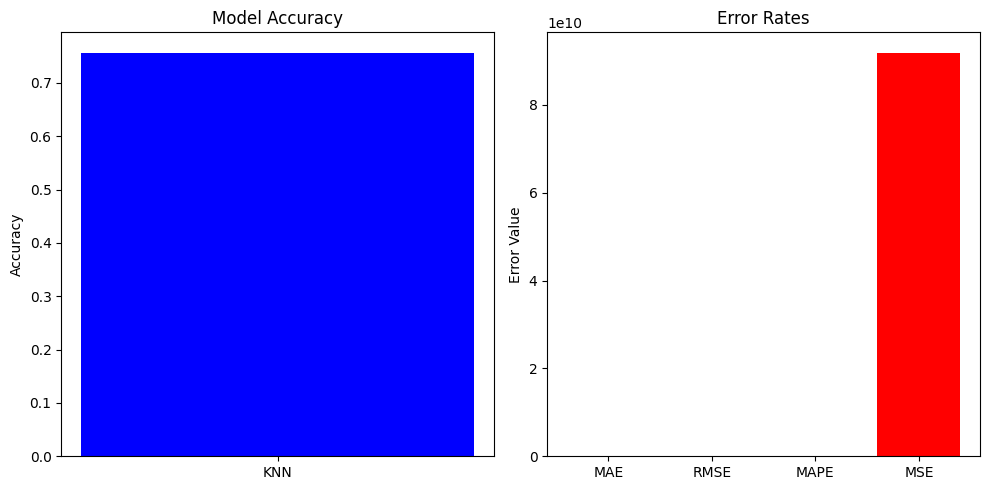

In [2]:
#KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('Walmart_sales (1).csv')

X = data[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)
print(f"R^2 Score (Accuracy): {accuracy}")
errors = pd.DataFrame({
    'MAE': [mae],
    'RMSE': [rmse],
    'MAPE': [mape],
    'MSE':[mse]
})

print("Error Rates:")
print(errors)


accuracy = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [1 - mape]  # Using 1 - MAPE as a simple accuracy measure
})

print("Accuracy:")
print(accuracy)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.bar(accuracy['Model'], accuracy['Accuracy'], color='blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(errors.columns, errors.iloc[0], color='red')
plt.title('Error Rates')
plt.ylabel('Error Value')

plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 19443291568.20797
MAE: 71325.20223776223
MAPE: 0.06429392541095459
RMSE: 139439.20384242004
  Metric          Value
0    MAE   71325.202238
1   MAPE       0.064294
2   RMSE  139439.203842
R^2 Score (Accuracy): 0.9384827512094996


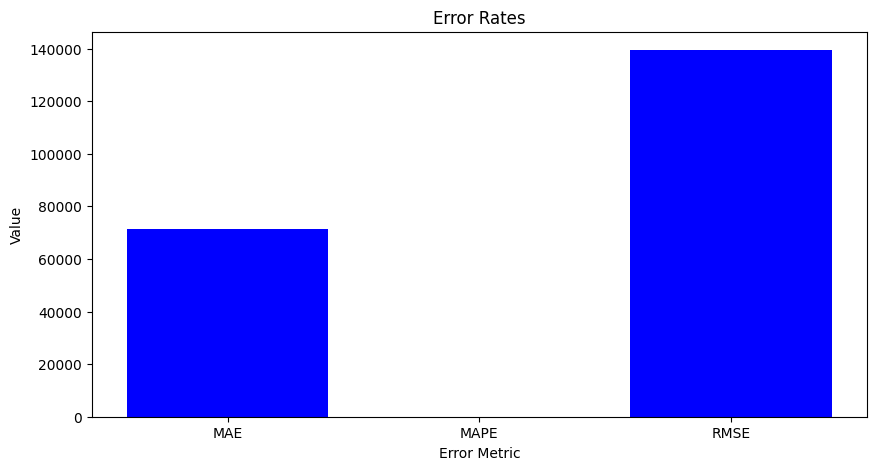

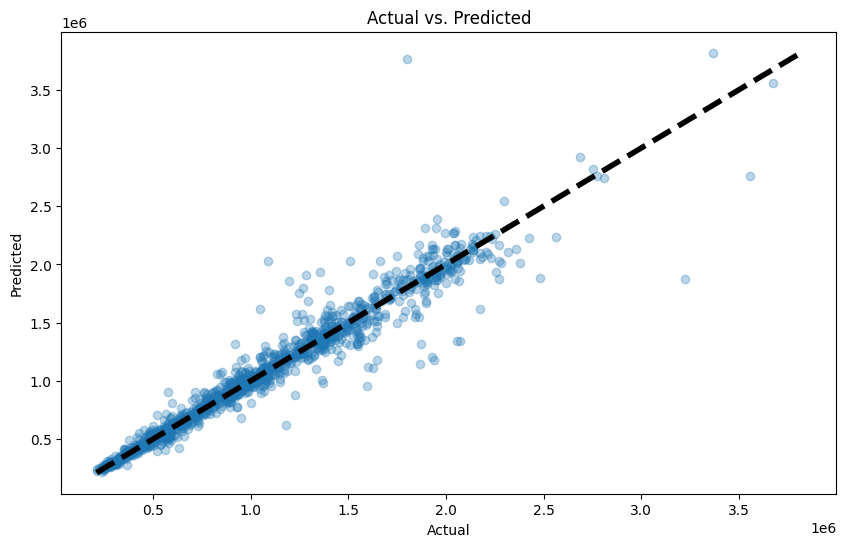

In [3]:
#DESCISION TREE REGRESSOR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Walmart_sales (1).csv')


data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")  # Adjust format as needed
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day



X = data[['Store', 'Year', 'Month', 'Day', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")


results = pd.DataFrame({
    "Metric": ["MAE", "MAPE", "RMSE"],
    "Value": [mae, mape, rmse]
})

print(results)
accuracy = r2_score(y_test, y_pred)

print(f"R^2 Score (Accuracy): {accuracy}")

plt.figure(figsize=(10, 5))
plt.bar(results['Metric'], results['Value'], color='blue')
plt.title('Error Rates')
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.show()

import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

            MAE           MSE           RMSE      MAPE  R^2 Score
0  74307.775144  2.036402e+10  142702.572727  6.608525   0.936788


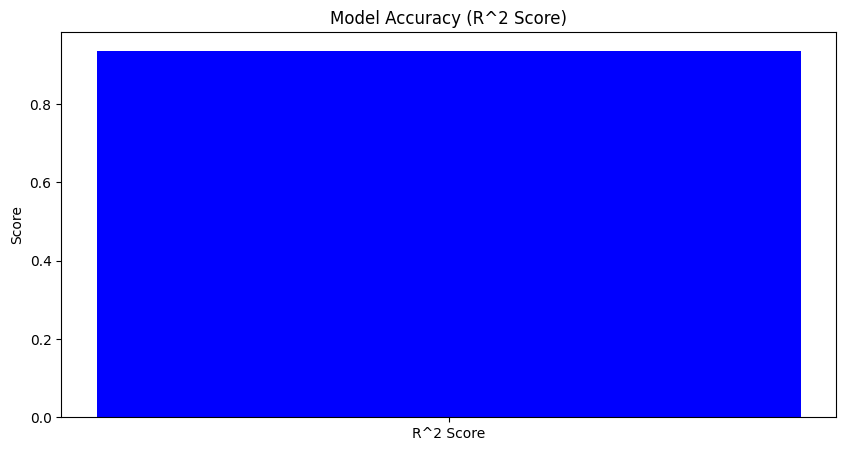

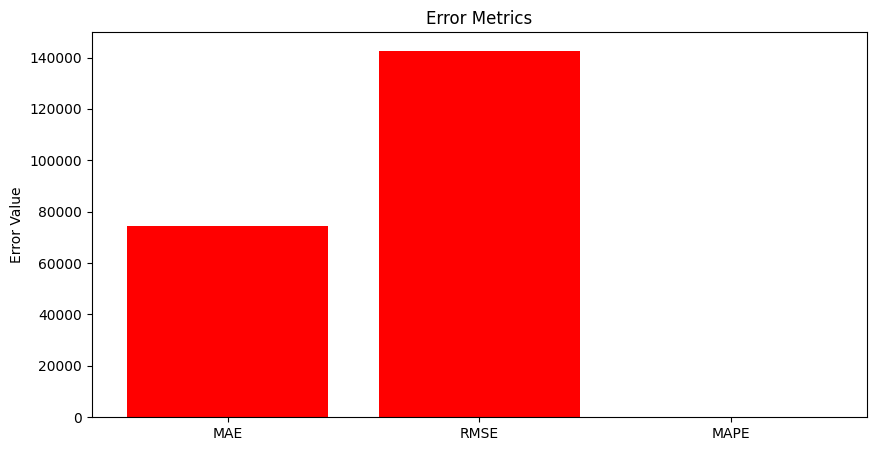

In [5]:
#RANDOMFOREST REGRESSION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Walmart_sales (1).csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Map the datetime to ordinal
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)

# Split the data into features and target variable
features = data.drop('Weekly_Sales', axis=1)
target = data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2 = r2_score(y_test, predictions)

# Create a DataFrame to store error metrics
error_metrics = pd.DataFrame({
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAPE': [mape],
    'R^2 Score': [r2]
})

# Print error metrics
print(error_metrics)

# Plot the accuracy (R^2 Score)
plt.figure(figsize=(10, 5))
plt.bar(['R^2 Score'], [r2], color='blue')
plt.ylabel('Score')
plt.title('Model Accuracy (R^2 Score)')
plt.show()

# Plot the error metrics
errors = [mae, rmse, mape]
error_names = ['MAE', 'RMSE', 'MAPE']

plt.figure(figsize=(10, 5))
plt.bar(error_names, errors, color='red')
plt.ylabel('Error Value')
plt.title('Error Metrics')
plt.show()
